In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [4]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [7]:
for col in strings:
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()
          

['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

['1_series_m' '1_series' '100' '124_spider' '190-class']
914

['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

['compact' 'midsize' 'large']
3

['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16



In [8]:
%matplotlib inline

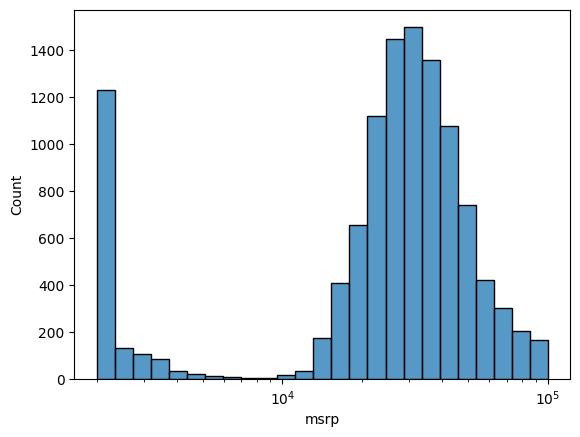

In [9]:
sns.histplot(df.msrp[df.msrp<100000],bins=25,log_scale=10)

plt.show()

In [10]:
price_logs = np.log1p(df.msrp)

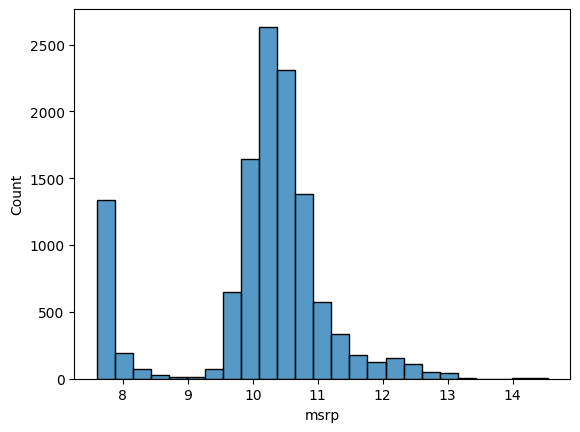

In [11]:
sns.histplot(price_logs,bins=25)
plt.show()

In [14]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(2382, 2382, 7150)

In [20]:
idx = np.arange(n)

In [27]:
np.random.seed(2)
np.random.shuffle(idx)
df_shuffle = df.iloc[idx]
df_shuffle

df_train = df_shuffle.iloc[:n_train]
df_val = df_shuffle.iloc[n_train:n_train + n_test]
df_test = df_shuffle.iloc[n_train + n_test:]

In [28]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [29]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_train.msrp.values)

In [30]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [32]:
len(df.columns), len(df_train.columns)

(16, 15)

## __2.5 Linear Regression__